# Classification problems with Keras

Classification is the task of recognize some items from a set of candidate targets.
This is a very common task for Deep Learning technique,
which is very well performed for example with **image recognition**.
An image recognition problem is a classification problem which takes as input some images.

# MNIST classification problem

In this task we have to classify grayscale images of handwritten digits (28 pixels by 28 pixels) into their 10 categories from 0 to 9.

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/)
is a classic dataset in the machine learning community. 
The dataset is a standard set of handwritten numerical digits from 0 to 9
which is commonly used as the "Hello World" test for Deep Learning classification problem.  
It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.
The entire images contain 28 pixels across and 28 pixels down, for a total of 784 pixels.

`Keras` comes with many dataset built in and
automatically splits the dataset into a training and validation set.

In [3]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as np_utils

import numpy as np
import matplotlib.pyplot as plt


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# 1D data
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28,28,1)
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(train_labels, num_classes=10)
y_test = np_utils.to_categorical(test_labels, num_classes=10)

# CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D,Dense, Flatten
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10

input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


2025-12-01 15:19:58.463014: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,578 (209.29 KB)

 Trainable params: 53,578 (209.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
batch_size = 16
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9900 - val_loss: 0.0348
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9845 - loss: 0.0508 - val_accuracy: 0.9892 - val_loss: 0.0339
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9854 - loss: 0.0467 - val_accuracy: 0.9903 - val_loss: 0.0345


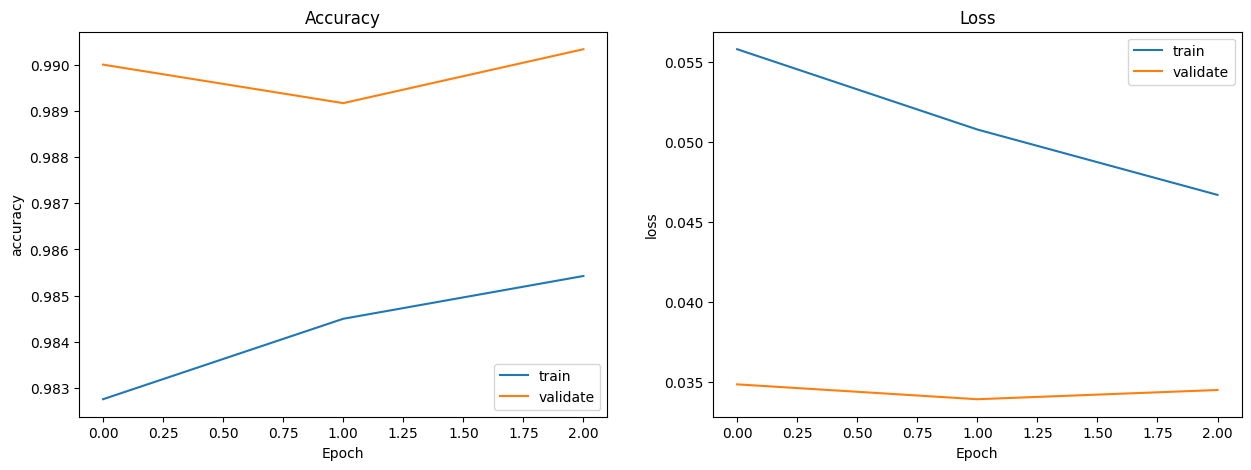

In [10]:
    # get history from the model
    h = model.history.history

    plt.figure(figsize=(15, 5))

    # accuracy plot
    plt.subplot(121)
    plt.title("Accuracy")
    plt.plot(h['accuracy'], label="train")
    plt.plot(h['val_accuracy'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()

    # loss plot
    plt.subplot(122)
    plt.title("Loss")
    plt.plot(h['loss'], label="train")
    plt.plot(h['val_loss'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend()

    plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=0)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

Test accuracy 0.9898999929428101
Test loss 0.030400579795241356


Try to remove the Dropout layer and comment the behaviour of the training/validation loss and accuracy

Try to achieve the best accuracy using only 2 epochs

Try to use the fashion mnist dataset https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data and try to achieve the best accuracy 